In [1]:
import pandas as pd
import numpy as np
from regression_inference import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=True)
X, y = spector_data.exog, spector_data.endog
X = pd.DataFrame(X)
y =pd.Series(y) 

In [3]:
model = LogisticRegression().fit(X, y, cov_type="HC0")
print(model)

Logistic Regression Results
---------------------------------------------
Dependent:                              GRADE
---------------------------------------------
 
const                              -13.0213**
                                     (5.1976)
 
GPA                                  2.8261**
                                     (1.2675)
 
TUCE                                   0.0952
                                     (0.1179)
 
PSI                                  2.3787**
                                     (0.9644)

---------------------------------------------
Accuracy                                0.812
Pseudo R-squared                        0.374
LR Statistic                           15.404
Observations                           32.000
Log Likelihood                        -12.890
Null Log Likelihood                   -20.592
Deviance                               25.779
Null Deviance                          41.183
AIC                                    33.7

/tmp/ipykernel_300223/275400588.py:1: UserWarning: 
Large coefficients detected (max |θ| > 13.02).
This may indicate separation in the data:
- Perfect or quasi-complete separation
- Classes are linearly separable
- Standard errors may be unreliable

  model = LogisticRegression().fit(X, y, cov_type="HC0")


In [4]:
prediction_set = [
    np.array([[3.5, 20.0, 1.0]]),
    np.array([[2.8, 25.0, 0.0]]),
    np.array([[3.9, 28.0, 1.0]]),
]
predictions = pd.concat([pd.DataFrame(model.predict(test_set, return_table=True)) for test_set in prediction_set], ignore_index=True)
predictions

,features,prediction_prob,prediction_class,std_error,z_statistic,P>|z|,ci_low_0.05,ci_high_0.05
0,"{'GPA': '3.50', 'TUCE': '20.00', 'PSI': '1.00'}",0.7599,1,0.7778,1.4810,0.139,0.4079,0.9356
1,"{'GPA': '2.80', 'TUCE': '25.00', 'PSI': '0.00'}",0.0613,0,0.9965,-2.7389,0.006,0.0092,0.3151
2,"{'GPA': '3.90', 'TUCE': '28.00', 'PSI': '1.00'}",0.9545,1,1.3352,2.2796,0.023,0.6051,0.9965


In [5]:
pd.DataFrame(model.inference_table())

,feature,coefficient,std_error,z_statistic,P>|t|,ci_low_0.05,ci_high_0.05
0,const,-13.0213,5.1976,-2.5053,0.012,-23.2084,-2.8343
1,GPA,2.8261,1.2675,2.2296,0.026,0.3418,5.3105
2,TUCE,0.0952,0.1179,0.8070,0.420,-0.136,0.3263
3,PSI,2.3787,0.9644,2.4664,0.014,0.4885,4.2689


In [6]:
pd.DataFrame(model.variance_inflation_factor())

,feature,VIF
0,GPA,1.1762
1,TUCE,1.1894
2,PSI,1.0129


In [7]:
model.feature_names

Index(['const', 'GPA', 'TUCE', 'PSI'], dtype='object')

In [8]:
prediction_set = [
    np.array([[2.66, 20.0, 0.0]]),
    np.array([[2.89, 22.0, 0.0]]),
    np.array([[3.28, 24.0, 0.0]]),
    np.array([[2.92, 12.0, 0.0]]),
]
predictions = pd.concat([pd.DataFrame(model.predict(test_set, return_table=True)) for test_set in prediction_set], ignore_index=True)
predictions

,features,prediction_prob,prediction_class,std_error,z_statistic,P>|z|,ci_low_0.05,ci_high_0.05
0,"{'GPA': '2.66', 'TUCE': '20.00', 'PSI': '0.00'}",0.0266,0,1.1685,-3.0816,0.002,0.0028,0.2124
1,"{'GPA': '2.89', 'TUCE': '22.00', 'PSI': '0.00'}",0.0595,0,0.8893,-3.1041,0.002,0.0110,0.2655
2,"{'GPA': '3.28', 'TUCE': '24.00', 'PSI': '0.00'}",0.1873,0,0.6411,-2.2897,0.022,0.0615,0.4474
3,"{'GPA': '2.92', 'TUCE': '12.00', 'PSI': '0.00'}",0.0259,0,1.5477,-2.3437,0.019,0.0013,0.3558


In [9]:
model.predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [10]:
model.probabilities

array([0.02657799, 0.05950125, 0.18725993, 0.02590164, 0.56989295,
       0.03485827, 0.02650406, 0.051559  , 0.11112666, 0.69351131,
       0.02447037, 0.18999744, 0.32223955, 0.19321116, 0.36098992,
       0.03018375, 0.05362641, 0.03858834, 0.58987249, 0.66078584,
       0.06137585, 0.90484727, 0.24177245, 0.85209089, 0.83829051,
       0.48113304, 0.63542059, 0.30721866, 0.84170413, 0.94534025,
       0.5291172 , 0.11103084])

Confusion Matrix:
[[18  3]
 [ 3  8]]

True Negatives:  18
False Positives: 3
False Negatives: 3
True Positives:  8

Accuracy: 0.8125

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        21
         1.0       0.73      0.73      0.73        11

    accuracy                           0.81        32
   macro avg       0.79      0.79      0.79        32
weighted avg       0.81      0.81      0.81        32



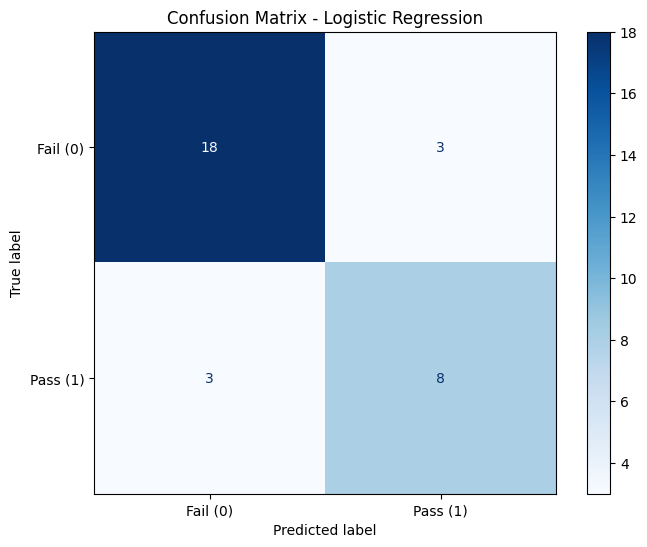

In [11]:
actual = y 
predicted = model.predictions
cm = confusion_matrix(actual, predicted)

print("Confusion Matrix:")
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(actual, predicted))

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail (0)', 'Pass (1)'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()